# Advice
- although don't have test data (no 2027 data), result are generalizable enough 
- training + validation 
- not straightforward as train on 70%, validate on 30%
- but outliers! and inconsistencies!

- way to generalize the training effort? 
k-fold cross validation
- randomly subsample the data enough times, create 70% over and over again --> basically exhausted all possibilities that can come out of data we have 
leave-one-out not computationally efficient 

fisher approach
- randomly sample data for train


mean of error
and variance of errorb




In [51]:
ls ../data/raw

'README for link + attrs for Aus kaggle dataset.txt'
'SALM Smoothed SA2 Datafiles (ASGS 2016) - March quarter 2022 (1).csv'
 au.csv:Zone.Identifier
 example.json
 example.json.txt
'kaggle data australian cities.csv'
'list of SA2 and their SA3 and state.xlsx'
 weatherAUS.csv


# Import all libraries needed here

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
from shapely.geometry import Point

In [2]:
ls ../data/raw

'README for link + attrs for Aus kaggle dataset.txt'
'SALM Smoothed SA2 Datafiles (ASGS 2016) - March quarter 2022 (1).csv'
 au.csv:Zone.Identifier
 example.json
 example.json.txt
'kaggle data australian cities.csv'
'list of SA2 and their SA3 and state.xlsx'
 weatherAUS.csv


# Read in the weather datasets and the employment dataset

In [831]:
weather_data_raw = pd.read_csv('../data/raw/weatherAUS.csv')
employment_data_raw = pd.read_csv('../data/raw/SALM Smoothed SA2 Datafiles (ASGS 2016) - March quarter 2022 (2).csv')

In [4]:
weather_data_raw.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,1/12/2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2/12/2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,3/12/2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,4/12/2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,5/12/2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [5]:
weather_data_raw['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

# Read in data to assist in filtering SA2s in Victoria
- for employment data

In [6]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [7]:
sa2_and_states = pd.read_excel('../data/raw/list of SA2 and their SA3 and state.xlsx')

In [8]:
sa2_and_states.head()

,SA2_5DIGITCODE_2016,SA2_MAINCODE_2016,SA2_NAME_2016,SA3_CODE_2016,SA3_NAME_2016,SA4_CODE_2016,SA4_NAME_2016,GCCSA_CODE_2016,GCCSA_NAME_2016,STATE_CODE_2016,STATE_NAME_2016,AREA_ALBERS_SQKM,Unnamed: 12,Unnamed: 13
0,11007,101021007,Braidwood,10102,Queanbeyan,101,Capital Region,1RNSW,Rest of NSW,1,New South Wales,3418.3525,NaN,NaN
1,11008,101021008,Karabar,10102,Queanbeyan,101,Capital Region,1RNSW,Rest of NSW,1,New South Wales,6.9825,NaN,This spreadsheet is downloaded from the ABS We...
2,11009,101021009,Queanbeyan,10102,Queanbeyan,101,Capital Region,1RNSW,Rest of NSW,1,New South Wales,4.7634,NaN,https://www.abs.gov.au/AUSSTATS/abs@.nsf/Detai...
3,11010,101021010,Queanbeyan - East,10102,Queanbeyan,101,Capital Region,1RNSW,Rest of NSW,1,New South Wales,13.0034,NaN,Its name is
4,11011,101021011,Queanbeyan Region,10102,Queanbeyan,101,Capital Region,1RNSW,Rest of NSW,1,New South Wales,3054.4099,NaN,Statistical Area Level 2 (SA2) ASGS Edition 20...


# Read in Australian City Data to Filter Out Cities in Victoria
- for the weather dataset

In [127]:
cities_states_lookup = pd.read_csv('../data/raw/kaggle data australian cities.csv')

In [128]:
cities_states_lookup.head()

,city,lat,lng,country,iso2,admin_name,capital,population,population_proper
0,Sydney,-33.8650,151.2094,Australia,AU,New South Wales,admin,5312163,4840600
1,Melbourne,-37.8136,144.9631,Australia,AU,Victoria,admin,5078193,4529500
2,Brisbane,-27.4678,153.0281,Australia,AU,Queensland,admin,2514184,2360241
3,Perth,-31.9522,115.8589,Australia,AU,Western Australia,admin,2059484,2039200
4,Adelaide,-34.9289,138.6011,Australia,AU,South Australia,admin,1345777,1295714


Obtain ALL cities in VICTORIA

In [591]:
vic_cities = cities_states_lookup[cities_states_lookup['admin_name'] == 'Victoria']

In [592]:
vic_cities

,city,lat,lng,country,iso2,admin_name,capital,population,population_proper
1,Melbourne,-37.8136,144.9631,Australia,AU,Victoria,admin,5078193,4529500
9,Geelong,-38.1500,144.3500,Australia,AU,Victoria,NaN,263280,191440
16,Ballarat,-37.5500,143.8500,Australia,AU,Victoria,NaN,105471,98543
17,Bendigo,-36.7500,144.2667,Australia,AU,Victoria,NaN,99122,95587
27,Shepparton,-36.3833,145.4000,Australia,AU,Victoria,NaN,51631,31197
...,...,...,...,...,...,...,...,...,...
1015,Smythesdale,-37.6500,143.6833,Australia,AU,Victoria,NaN,1032,1032
1019,Coleraine,-37.6000,141.7000,Australia,AU,Victoria,NaN,1029,1029
1025,Wesburn,-37.7670,145.6470,Australia,AU,Victoria,NaN,1019,1019
1027,Lethbridge,-37.9667,144.1330,Australia,AU,Victoria,NaN,1014,1014


# Also, as per the attribute documentation on the weather dataset, the <code>Location</code> column does not specify the "granularity" of the location (e.g. town, city, etc)

But, given that we have <code>cities_states_lookup</code> dataset,
- So a starting point might be to filter out all weather observations that were *not definitely* taken in Victoria
    - That is, if the value in <code>Location</code> is located in any city that does *not* belong in Victoria (we have the dataset <code>cities_states_lookup</code>), then we have high confidence that the weather observation was *not* taken in Victoria.
    - As for the rest of <code>Location</code>, we look whether they exist in <code>vic_cities</code> or not. 
        - If not, then if there's only few such values we can do a quick google search as to whether it is located in Victoria or not. 

# I. Preprocessing the weather dataset

To make the preprocessing steps more compact, versatile, and reversible, 

I will create a dictionary (where its value is also a dictionary) as such: 

- <code> history_weather_preproc = { num_iteration: {'data': pd_data, 'description': what_is_done} } </code>, where: 
    - <code>num_iteration = 0,1,2,...</code> signifying how many times the dataset has been altered for preprocessing
    - <code>history_weather_preproc[num_iteration]['description']</code> is a (preferrably short) description of what has been done to the dataframe, in which the resulting dataframe will be stored in <code>history_weather_preproc[num_iteration]['data']</code>



A caveat of this is that it can be memory intensive but we'll see the consequences later

Initializing the dictionary mentioned above,

In [89]:
history_weather_preproc = {0: {'data': weather_data_raw, 'description':'raw dataset'}}

In [92]:
#In case if I forget what kind of history do I keep track on preprocessing
history_weather_preproc[0].keys()

dict_keys(['data', 'description'])

In [93]:
#Example: accessing the description of what has been done to the data by:
history_weather_preproc[0]['description']

'raw dataset'

In [98]:
#Example: accessing the resulting *preprocessed* dataframe itself:
history_weather_preproc[0]['data'].head(3)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,1/12/2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2/12/2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,3/12/2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No


In [97]:
#Finally, to keep track of the preprocessing steps we've done:
history_weather_preproc.keys()

dict_keys([0])

# First thing to do is check whether there's inconsistent formatting for both:

1. <code>Location</code> column in the weather dataset
2. <code>city</code> column in the <code>cities_states_lookup</code> and <code>vic_cities</code>

In [614]:
history_weather_preproc[0]['data']['Location'].sort_values().unique()

array(['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek',
       'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar',
       'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart',
       'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport',
       'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle',
       'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF',
       'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale',
       'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville',
       'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia',
       'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera'],
      dtype=object)

For the weather dataset, it seems that locations with more than 1 word are *not* separated by whitespace, using camel case instead.

In [613]:
cities_states_lookup['city'][
    cities_states_lookup['city'].str.strip().str.contains(' ')
].sort_values().unique()[0:20]

array(['Agnes Water', 'Airlie Beach', 'Alice River', 'Alice Springs',
       'Alligator Creek', 'Alton Downs', 'Angle Vale', 'Anna Bay',
       'Apollo Bay', 'Bacchus Marsh', 'Badger Creek', 'Bakers Hill',
       'Banora Point', 'Barwon Heads', 'Basin View', 'Batemans Bay',
       'Bay View', 'Beaconsfield Upper', 'Beauty Point', 'Belgrave South'],
      dtype=object)

While the <code>cities_state_lookup</code> dataset has its 2-word city names naturally separated by whitespace.

# <font color='blue'>Pre-processing: To mitigate this, I will appropriately separate 2-word locations in the weather dataset *by whitespace* so that is is consistent with <code>cities_states_lookup</code></font>

A function to separate 2-word locations in the weather dataset, provided that each word always begin with a capital letter. 

In [629]:
#function to separate 2-word locations on weather dataset
import re

def combine_words(match):
    return f'{match.group(1)}{match.group(2)} {match.group(3)}'

def sepr_by_whitespace(location_str):
    #the function combine_words specifies how do we want to alter
    #the input string "location_str"
    return re.sub(r'([A-Z])([a-z]+)([A-Z])',combine_words,location_str)

#as an example, 
print(sepr_by_whitespace('GoldCoast'))
print(sepr_by_whitespace('PearceRAAF'))

#make sure that one-word locations are still retained as is 
print(sepr_by_whitespace('Sydney'))


Gold Coast
Pearce RAAF
Sydney


In [635]:
history_weather_preproc[0]['data']['Location'].map(lambda location: sepr_by_whitespace(location)).unique()[0:10]

array(['Albury', 'Badgerys Creek', 'Cobar', 'Coffs Harbour', 'Moree',
       'Newcastle', 'Norah Head', 'Norfolk Island', 'Penrith', 'Richmond'],
      dtype=object)

This counts as the next step of our preprocessing.

In [633]:
history_weather_preproc[1]['data'] = history_weather_preproc[0]['data'].copy()

In [636]:
history_weather_preproc[1]['data']['Location'] = history_weather_preproc[1]['data']['Location'].map(lambda location: sepr_by_whitespace(location))

Take a look at the transformed <code>Location</code> values, make sure that there's nothing clunky going on.

In [639]:
history_weather_preproc[1]['data']['Location'].unique()

array(['Albury', 'Badgerys Creek', 'Cobar', 'Coffs Harbour', 'Moree',
       'Newcastle', 'Norah Head', 'Norfolk Island', 'Penrith', 'Richmond',
       'Sydney', 'Sydney Airport', 'Wagga Wagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'Mount Ginini',
       'Ballarat', 'Bendigo', 'Sale', 'Melbourne Airport', 'Melbourne',
       'Mildura', 'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane',
       'Cairns', 'Gold Coast', 'Townsville', 'Adelaide', 'Mount Gambier',
       'Nuriootpa', 'Woomera', 'Albany', 'Witchcliffe', 'Pearce RAAF',
       'Perth Airport', 'Perth', 'Salmon Gums', 'Walpole', 'Hobart',
       'Launceston', 'Alice Springs', 'Darwin', 'Katherine', 'Uluru'],
      dtype=object)

Document this preprocessing step.

In [640]:
history_weather_preproc[1]['description'] = 'Separated locations in weather dataset by whitespace, instead of camel case'

# Filter out <code>Location</code>s that are cities that are not definitely in Victoria.

Obtain cities that are not in Victoria.

In [647]:
#filter all cities outside Victoria
cities_not_in_vic = cities_states_lookup[
    cities_states_lookup['admin_name'] != 'Victoria'
    ]['city']

In [656]:
cities_not_in_vic.unique()[0:10]

array(['Sydney', 'Brisbane', 'Perth', 'Adelaide', 'Gold Coast',
       'Canberra', 'Newcastle', 'Wollongong', 'Hobart', 'Townsville'],
      dtype=object)

In [649]:
#obtain all weather observations outside Victoria
weather_obs_not_in_vic = history_weather_preproc[1]['data'][
    history_weather_preproc[1]['data']['Location'].isin(cities_not_in_vic)
]

In [657]:
#obtain all indexes of the weather observations that are not in Victoria
weather_obs_not_in_vic_idx = weather_obs_not_in_vic.index

In [658]:
weather_obs_not_in_vic_idx

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            213970, 213971, 213972, 213973, 213974, 213975, 213976, 213977,
            213978, 213979],
           dtype='int64', length=111826)

Now, the rest of the observations *should be* in Victoria..

In [670]:
history_weather_preproc[1]['data'][
    ~history_weather_preproc[1]['data'].index.\
        isin(weather_obs_not_in_vic_idx)
]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
4531,1/01/2009,Badgerys Creek,13.3,34.2,0.0,NaN,NaN,W,61.0,NNE,...,NaN,1005.6,NaN,NaN,NaN,21.0,NaN,No,0.0,No
4532,2/01/2009,Badgerys Creek,14.7,26.1,0.0,NaN,NaN,SE,46.0,SE,...,54.0,1012.9,1013.5,NaN,NaN,20.7,22.2,No,0.0,No
4533,3/01/2009,Badgerys Creek,13.6,22.3,0.0,NaN,NaN,NNE,30.0,ESE,...,51.0,1021.9,1019.2,NaN,NaN,17.9,21.7,No,0.0,No
4534,4/01/2009,Badgerys Creek,17.7,31.2,0.0,NaN,NaN,NE,39.0,NNE,...,43.0,1018.7,1013.6,NaN,NaN,22.0,30.6,No,0.0,No
4535,5/01/2009,Badgerys Creek,15.5,38.8,0.0,NaN,NaN,SW,50.0,NNE,...,19.0,1013.2,1007.6,NaN,NaN,22.7,37.6,No,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217044,24/08/2022,Uluru,3.9,19.4,0.0,NaN,NaN,ESE,46.0,ESE,...,21.0,1030.9,1026.5,NaN,NaN,10.2,18.2,No,0.0,No
217045,25/08/2022,Uluru,3.6,20.0,0.0,NaN,NaN,E,44.0,E,...,17.0,1028.0,1023.6,NaN,NaN,10.4,19.8,No,0.0,No
217046,26/08/2022,Uluru,3.8,21.2,0.0,NaN,NaN,E,35.0,E,...,16.0,1024.2,1019.4,5.0,NaN,11.2,20.1,No,0.0,No
217047,27/08/2022,Uluru,3.2,24.6,0.0,NaN,NaN,ENE,28.0,ESE,...,10.0,1019.9,1014.3,NaN,NaN,12.2,23.4,No,0.0,No


In [671]:
history_weather_preproc[1]['data'][
    ~history_weather_preproc[1]['data'].index.\
        isin(weather_obs_not_in_vic_idx)
]['Location'].unique()

array(['Badgerys Creek', 'Norah Head', 'Norfolk Island', 'Sydney Airport',
       'Williamtown', 'Tuggeranong', 'Mount Ginini', 'Ballarat',
       'Bendigo', 'Sale', 'Melbourne Airport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Woomera',
       'Witchcliffe', 'Pearce RAAF', 'Perth Airport', 'Salmon Gums',
       'Walpole', 'Uluru'], dtype=object)

It seems like there are some <code>Locations</code> which are still located outside Australia (e.g. Sydney Airport, Perth Airport, etc), meaning that they are not cities per se.

# <font color='blue'>Preprocessing: However, we can still filter the weather dataset such that the locations are the ones listed above</font>

This counts as the next step of our preprocessing.

In [666]:
history_weather_preproc[2]= {'data':None, 'description':None}

In [672]:
history_weather_preproc[2]['data'] = history_weather_preproc[1]['data'][
    ~history_weather_preproc[1]['data'].index.\
        isin(weather_obs_not_in_vic_idx)
].copy()

In [674]:
history_weather_preproc[2]['data'].head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
4531,1/01/2009,Badgerys Creek,13.3,34.2,0.0,NaN,NaN,W,61.0,NNE,...,NaN,1005.6,NaN,NaN,NaN,21.0,NaN,No,0.0,No
4532,2/01/2009,Badgerys Creek,14.7,26.1,0.0,NaN,NaN,SE,46.0,SE,...,54.0,1012.9,1013.5,NaN,NaN,20.7,22.2,No,0.0,No
4533,3/01/2009,Badgerys Creek,13.6,22.3,0.0,NaN,NaN,NNE,30.0,ESE,...,51.0,1021.9,1019.2,NaN,NaN,17.9,21.7,No,0.0,No
4534,4/01/2009,Badgerys Creek,17.7,31.2,0.0,NaN,NaN,NE,39.0,NNE,...,43.0,1018.7,1013.6,NaN,NaN,22.0,30.6,No,0.0,No
4535,5/01/2009,Badgerys Creek,15.5,38.8,0.0,NaN,NaN,SW,50.0,NNE,...,19.0,1013.2,1007.6,NaN,NaN,22.7,37.6,No,0.0,No


Document this preprocessing step.

In [676]:
history_weather_preproc[2]['description'] = 'Filter out cities that are definitely not in Victoria'

# As for the rest of the <code>Location</code>s in the weather dataset, I proceed to: 
- obtain the shapefile for Victoria (the boundaries, coordinate-wise)
- latitude and longitude for each weather observation in whereever the observation was taken

Since the granularity of the rest of <code>Location</code> is unknown, a better method is to determine whether each of the location of the weather observation falls in the boundary of Victoria or not.

Import the datasets containing the geographic location of each weather observation.

In [683]:
location_weather = pd.read_csv('../data/raw/locationsAUS.csv')
location_weather.head()

,stnID,name,stnNum,latitude,longitude
0,2002,Albury,72160,-36.0690,146.9509
1,2005,BadgerysCreek,67108,-33.8969,150.7281
2,2029,Cobar,48027,-31.4840,145.8294
3,2030,CoffsHarbour,59040,-30.3107,153.1187
4,2084,Moree,53115,-29.4914,149.8458


Make sure that the locations in the weather dataset and the ones above are consistent.

In [686]:
set(location_weather['name']) - set(history_weather_preproc[0]['data']['Location']) ==\
     set(location_weather['name']) - set(history_weather_preproc[0]['data']['Location']) ==\
        set()

True

# <font color='blue'>Pre-processing: Match each <code>Location</code> in the (partially preprocesssed) weather dataset with its corresponding geographic coordinate </font>

Since the locations in <code>location_weather</code> are still not properly formatted (2-word locations are not separated by whitespace) we can format this real quick

In [689]:
location_weather['name'] = location_weather['name'].map(lambda location: sepr_by_whitespace(location))

In [693]:
#obtain each weather observation's latitude and longitude, temporarily store in in a variable before officially documenting
#this as another preprocessing step
weather_with_lat_and_lng = history_weather_preproc[2]['data'].merge(location_weather[['name','latitude','longitude']],
                                    left_on = 'Location',
                                    right_on = 'name',
                                    how = 'inner').\
                                    drop(columns='name').\
                                    copy()

In [731]:
#
weather_with_lat_and_lng.shape[0] == history_weather_preproc[2]['data'].shape[0]

True

Document this as another preprocessing step.

In [736]:
history_weather_preproc[3] = {'data':None, 'description':None}
history_weather_preproc[3]['data'] = weather_with_lat_and_lng
history_weather_preproc[3]['description'] = 'added geographic location for the location of each weather observation'

# Import the shapefile for each state in Australia

In [ ]:
states_shpfiles = gpd.read_file('../data/raw/STE_2021_AUST_GDA2020.shp')

In [ ]:
states_shpfiles

,STE_CODE21,STE_NAME21,CHG_FLAG21,CHG_LBL21,AUS_CODE21,AUS_NAME21,AREASQKM21,LOCI_URI21,geometry
0,1,New South Wales,0,No change,AUS,Australia,8.007977e+05,http://linked.data.gov.au/dataset/asgsed3/STE/1,"MULTIPOLYGON (((159.06230 -31.50886, 159.06218..."
1,2,Victoria,0,No change,AUS,Australia,2.274962e+05,http://linked.data.gov.au/dataset/asgsed3/STE/2,"MULTIPOLYGON (((146.29286 -39.15778, 146.29341..."
2,3,Queensland,0,No change,AUS,Australia,1.730171e+06,http://linked.data.gov.au/dataset/asgsed3/STE/3,"MULTIPOLYGON (((142.53140 -10.68301, 142.53072..."
3,4,South Australia,0,No change,AUS,Australia,9.842314e+05,http://linked.data.gov.au/dataset/asgsed3/STE/4,"MULTIPOLYGON (((140.66025 -38.06256, 140.66006..."
4,5,Western Australia,0,No change,AUS,Australia,2.526632e+06,http://linked.data.gov.au/dataset/asgsed3/STE/5,"MULTIPOLYGON (((117.86953 -35.19108, 117.86961..."
5,6,Tasmania,0,No change,AUS,Australia,6.801754e+04,http://linked.data.gov.au/dataset/asgsed3/STE/6,"MULTIPOLYGON (((144.60439 -41.01001, 144.60443..."
6,7,Northern Territory,0,No change,AUS,Australia,1.348134e+06,http://linked.data.gov.au/dataset/asgsed3/STE/7,"MULTIPOLYGON (((133.02818 -10.90839, 133.02982..."
7,8,Australian Capital Territory,0,No change,AUS,Australia,2.358133e+03,http://linked.data.gov.au/dataset/asgsed3/STE/8,"POLYGON ((149.06239 -35.15910, 149.09134 -35.1..."
8,9,Other Territories,0,No change,AUS,Australia,2.557420e+02,http://linked.data.gov.au/dataset/asgsed3/STE/9,"MULTIPOLYGON (((167.94747 -29.12757, 167.94748..."
9,Z,Outside Australia,1,New,ZZZ,Outside Australia,NaN,http://linked.data.gov.au/dataset/asgsed3/STE/Z,None


# Specifically, obtain the state shapefile in Victoria. 

In [733]:
vic_shp_geometry = states_shpfiles.loc[states_shpfiles['STE_NAME21'] == 'Victoria', 'geometry'].values[0]

# For each remaining weather observations, determine whether its location is located in Victoria or not.

In [760]:
weather_data_3rd_iter = history_weather_preproc[3]['data'].copy()
weather_data_3rd_iter['coord_point_object'] = weather_data_3rd_iter.apply(lambda row: Point(row['longitude'], row['latitude']),axis=1)

In [762]:
location_and_its_coord = weather_data_3rd_iter[['Location','coord_point_object']].set_index('Location')

In [763]:
is_weather_locs_in_vic = {}
for loc_weather in weather_data_3rd_iter['Location'].unique():

    coord_in_loc = location_and_its_coord.loc[loc_weather,:].iloc[0,:].values[0]

    is_weather_locs_in_vic[loc_weather] = coord_in_loc.within(vic_shp_geometry)


/home/keithzyyy/.local/lib/python3.8/site-packages/swifter/swifter.py:87: UserWarning: This pandas object has duplicate indices, and swifter may not be able to improve performance. Consider resetting the indices with `df.reset_index(drop=True)`.
  warnings.warn(


# Indicator variable: is a location of a weather observation located in Victoria?

In [768]:
weather_data_3rd_iter['is_in_vic'] = weather_data_3rd_iter['Location'].map(lambda location: is_weather_locs_in_vic[location])

In [771]:
weather_data_3rd_iter[weather_data_3rd_iter['is_in_vic'] == True]['Location'].unique()

array(['Ballarat', 'Bendigo', 'Sale', 'Melbourne Airport', 'Melbourne',
       'Mildura', 'Nhil', 'Portland', 'Watsonia', 'Dartmoor'],
      dtype=object)

# <font color='blue'>Preprocessing: only keep weather observations  which were taken in Victoria with the aid of shapefile in Victoria </font>

In [775]:
history_weather_preproc[4] = {'data':None,'description':None}
history_weather_preproc[4]['data'] = weather_data_3rd_iter[weather_data_3rd_iter['is_in_vic'] == True].drop(columns='is_in_vic')
history_weather_preproc[4]['description'] = 'only retaining weather observations which were recorded in Victoria'

In [776]:
history_weather_preproc[4]['data']

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,latitude,longitude,coord_point_object
31527,1/12/2008,Ballarat,5.8,17.6,3.2,NaN,NaN,W,52.0,W,...,6.0,NaN,10.4,15.7,Yes,0.4,No,-37.5127,143.7911,POINT (143.7911 -37.5127)
31528,2/12/2008,Ballarat,4.3,19.5,0.4,NaN,NaN,WNW,44.0,WNW,...,6.0,8.0,12.5,17.6,No,0.6,No,-37.5127,143.7911,POINT (143.7911 -37.5127)
31529,3/12/2008,Ballarat,9.5,18.8,0.6,NaN,NaN,W,43.0,WSW,...,4.0,8.0,11.2,16.5,No,0.2,No,-37.5127,143.7911,POINT (143.7911 -37.5127)
31530,4/12/2008,Ballarat,6.7,21.8,0.2,NaN,NaN,NNE,39.0,ENE,...,4.0,NaN,14.4,20.6,No,1.2,Yes,-37.5127,143.7911,POINT (143.7911 -37.5127)
31531,5/12/2008,Ballarat,13.3,25.6,1.2,NaN,NaN,NW,61.0,NNW,...,6.0,1.0,18.3,24.3,Yes,0.0,No,-37.5127,143.7911,POINT (143.7911 -37.5127)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75328,24/08/2022,Dartmoor,6.0,12.1,2.8,NaN,NaN,WSW,39.0,WNW,...,NaN,NaN,9.5,10.7,Yes,4.6,Yes,-37.9222,141.2614,POINT (141.2614 -37.9222)
75329,25/08/2022,Dartmoor,8.9,13.5,4.6,NaN,NaN,SSW,17.0,SSW,...,NaN,NaN,10.7,13.2,Yes,0.4,No,-37.9222,141.2614,POINT (141.2614 -37.9222)
75330,26/08/2022,Dartmoor,5.9,12.7,0.4,NaN,NaN,NW,11.0,ENE,...,NaN,NaN,7.8,12.3,No,0.2,No,-37.9222,141.2614,POINT (141.2614 -37.9222)
75331,27/08/2022,Dartmoor,4.6,17.5,0.2,NaN,NaN,N,35.0,NNE,...,NaN,NaN,9.4,16.0,No,0.0,No,-37.9222,141.2614,POINT (141.2614 -37.9222)


In [777]:
weather_data_vic = history_weather_preproc[4]['data']

In [791]:
weather_data_vic

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,latitude,longitude,coord_point_object
31527,1/12/2008,Ballarat,5.8,17.6,3.2,NaN,NaN,W,52.0,W,...,6.0,NaN,10.4,15.7,Yes,0.4,No,-37.5127,143.7911,POINT (143.7911 -37.5127)
31528,2/12/2008,Ballarat,4.3,19.5,0.4,NaN,NaN,WNW,44.0,WNW,...,6.0,8.0,12.5,17.6,No,0.6,No,-37.5127,143.7911,POINT (143.7911 -37.5127)
31529,3/12/2008,Ballarat,9.5,18.8,0.6,NaN,NaN,W,43.0,WSW,...,4.0,8.0,11.2,16.5,No,0.2,No,-37.5127,143.7911,POINT (143.7911 -37.5127)
31530,4/12/2008,Ballarat,6.7,21.8,0.2,NaN,NaN,NNE,39.0,ENE,...,4.0,NaN,14.4,20.6,No,1.2,Yes,-37.5127,143.7911,POINT (143.7911 -37.5127)
31531,5/12/2008,Ballarat,13.3,25.6,1.2,NaN,NaN,NW,61.0,NNW,...,6.0,1.0,18.3,24.3,Yes,0.0,No,-37.5127,143.7911,POINT (143.7911 -37.5127)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75328,24/08/2022,Dartmoor,6.0,12.1,2.8,NaN,NaN,WSW,39.0,WNW,...,NaN,NaN,9.5,10.7,Yes,4.6,Yes,-37.9222,141.2614,POINT (141.2614 -37.9222)
75329,25/08/2022,Dartmoor,8.9,13.5,4.6,NaN,NaN,SSW,17.0,SSW,...,NaN,NaN,10.7,13.2,Yes,0.4,No,-37.9222,141.2614,POINT (141.2614 -37.9222)
75330,26/08/2022,Dartmoor,5.9,12.7,0.4,NaN,NaN,NW,11.0,ENE,...,NaN,NaN,7.8,12.3,No,0.2,No,-37.9222,141.2614,POINT (141.2614 -37.9222)
75331,27/08/2022,Dartmoor,4.6,17.5,0.2,NaN,NaN,N,35.0,NNE,...,NaN,NaN,9.4,16.0,No,0.0,No,-37.9222,141.2614,POINT (141.2614 -37.9222)


# Next, we can parse the dates and separate them into <code>day, month, year</code>

Since all the dates are roughly formatted as <code>DD/MM/YYYY</code> we can split them by '/'

In [792]:
split_dates = weather_data_vic['Date'].str.split('/', expand=True).rename(columns={0:'Day',1:'Month',2:'Year'})

Check the unique values of each day, month, and year

In [794]:
split_dates['Day'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31'], dtype=object)

In [795]:
split_dates['Month'].unique()

array(['12', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10',
       '11'], dtype=object)

In [796]:
split_dates['Year'].unique()

array(['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021', '2022'],
      dtype=object)

Probably can parse each of them as integers (not necessarily numerical)

In [799]:
split_dates['Day'] = split_dates['Day'].astype('int')
split_dates['Month'] = split_dates['Month'].astype('int')
split_dates['Year'] = split_dates['Year'].astype('int')

In [804]:
split_dates

,Day,Month,Year
31527,1,12,2008
31528,2,12,2008
31529,3,12,2008
31530,4,12,2008
31531,5,12,2008
...,...,...,...
75328,24,8,2022
75329,25,8,2022
75330,26,8,2022
75331,27,8,2022


# Since the order of the data for <code>split_dates</code> and <code>weather_data_vic</code> is preserved, I proceed to concatenate the former into the latter.

In [808]:
pd.concat([split_dates, weather_data_vic],axis=1).drop(columns='Date')

,Day,Month,Year,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,latitude,longitude,coord_point_object
31527,1,12,2008,Ballarat,5.8,17.6,3.2,NaN,NaN,W,...,6.0,NaN,10.4,15.7,Yes,0.4,No,-37.5127,143.7911,POINT (143.7911 -37.5127)
31528,2,12,2008,Ballarat,4.3,19.5,0.4,NaN,NaN,WNW,...,6.0,8.0,12.5,17.6,No,0.6,No,-37.5127,143.7911,POINT (143.7911 -37.5127)
31529,3,12,2008,Ballarat,9.5,18.8,0.6,NaN,NaN,W,...,4.0,8.0,11.2,16.5,No,0.2,No,-37.5127,143.7911,POINT (143.7911 -37.5127)
31530,4,12,2008,Ballarat,6.7,21.8,0.2,NaN,NaN,NNE,...,4.0,NaN,14.4,20.6,No,1.2,Yes,-37.5127,143.7911,POINT (143.7911 -37.5127)
31531,5,12,2008,Ballarat,13.3,25.6,1.2,NaN,NaN,NW,...,6.0,1.0,18.3,24.3,Yes,0.0,No,-37.5127,143.7911,POINT (143.7911 -37.5127)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75328,24,8,2022,Dartmoor,6.0,12.1,2.8,NaN,NaN,WSW,...,NaN,NaN,9.5,10.7,Yes,4.6,Yes,-37.9222,141.2614,POINT (141.2614 -37.9222)
75329,25,8,2022,Dartmoor,8.9,13.5,4.6,NaN,NaN,SSW,...,NaN,NaN,10.7,13.2,Yes,0.4,No,-37.9222,141.2614,POINT (141.2614 -37.9222)
75330,26,8,2022,Dartmoor,5.9,12.7,0.4,NaN,NaN,NW,...,NaN,NaN,7.8,12.3,No,0.2,No,-37.9222,141.2614,POINT (141.2614 -37.9222)
75331,27,8,2022,Dartmoor,4.6,17.5,0.2,NaN,NaN,N,...,NaN,NaN,9.4,16.0,No,0.0,No,-37.9222,141.2614,POINT (141.2614 -37.9222)


# <font color='blue'>Preprocessing: parsing the dates into each of <code>Day, Month, Year</code></font>

This is counted as an official preprocessing step.

In [810]:
#how many iterations are we in right now
history_weather_preproc.keys()

dict_keys([0, 1, 2, 3, 4])

In [812]:
history_weather_preproc[5] = {'data':None, 'description':None}
history_weather_preproc[5]['data'] = pd.concat([split_dates, weather_data_vic],axis=1).drop(columns='Date').copy()
history_weather_preproc[5]['description'] = 'parsed the dates into each of day, month, and year'

In [815]:
weather_data_vic = history_weather_preproc[5]['data']

In [829]:
weather_data_vic.dtypes[weather_data_vic.dtypes == 'object']

Location              object
WindGustDir           object
WindDir9am            object
WindDir3pm            object
RainToday             object
RainTomorrow          object
coord_point_object    object
dtype: object

# For each column in the weather dataset, calculate the % of missing columns

In [817]:
nrows_weather = weather_data_vic.shape[0]

#to display the missing values, it would be helpful to show the proportion (0-1) missing
#and the actual number of instances missing. 
weather_missing_vals_per_col = pd.DataFrame(pd.concat(
    [round( 100*(weather_data_vic.isna().sum() / nrows_weather),2 ).sort_values(),
    weather_data_vic.isna().sum().sort_values()
    ], 
    axis=1), 
)
weather_missing_vals_per_col.columns = ['Proportion_missing', 'Num_missing'] 

In [818]:
weather_missing_vals_per_col

,Proportion_missing,Num_missing
Day,0.00,0
latitude,0.00,0
longitude,0.00,0
coord_point_object,0.00,0
Month,0.00,0
Location,0.00,0
Year,0.00,0
Temp3pm,1.21,532
MaxTemp,1.29,564
MinTemp,1.35,590


Although the column with the lowest missing values only contain 1.55% of missing values, the number of instances itself is quite a lot (in this case, 500 ish)

I will investigate the top 4 columns containing the largest proportion of missing values.
- 

First of all, are the data types appropriately encoded for each of the 4 columns (<code>Cloud9am, Cloud3pm, Evaporation, Sunshine</code>)?

In [819]:
weather_data_vic.dtypes[['Cloud9am', 'Cloud3pm', 'Evaporation', 'Sunshine']]

Cloud9am       float64
Cloud3pm       float64
Evaporation    float64
Sunshine       float64
dtype: object

Ok, all of them are numerical, consistent with the attribute documentation
- <code>Cloud9am</code>: fraction of sky obscured at 9am
- <code>Cloud3pm</code>: fraction of sky obscured at 3pm
- <code>Evaporation</code>: "Class A" pan evaporation in mm
- <code>Sunshine</code>: Number of hours of bright sunshine in the day

In [820]:
weather_missing_vals_per_col.loc[['Sunshine'],['Proportion_missing']].values[0][0]

44.68

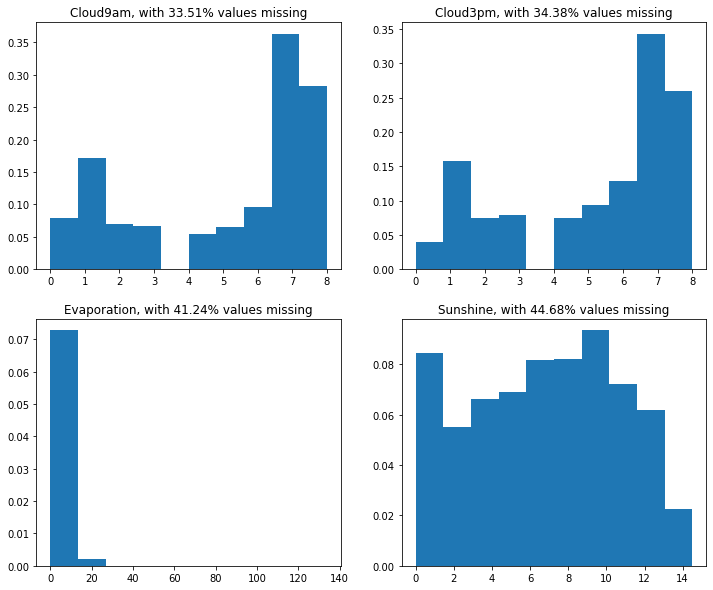

In [821]:
#number of columns with top 4 most missing values
cols_with_most_missing = ['Cloud9am', 'Cloud3pm', 'Evaporation', 'Sunshine']

NUM_COLS_MOST_MISSING_VALS = len(cols_with_most_missing)

plt.figure(figsize=(12,10))
for i in range(1, NUM_COLS_MOST_MISSING_VALS + 1):

    plt.subplot(2,2,i)

    col = cols_with_most_missing[i-1]

    #to access value in a 1x1 dataframe, use df.values[0] 
    #which returns an array. So need to access it again 
    proportion_missing_col = weather_missing_vals_per_col.loc[
                [col],['Proportion_missing']
                ].\
                values[0]\
                [0]

    plt.title(f'{col}, with {round(proportion_missing_col,2)}% values missing')

    #plot the distribution of 'col', but only from the  
    #data without any missing values

    plt.hist(
        weather_data_vic[col][~weather_data_vic[col].isna()],
        density=True
    )

    

Except for <code>evaporation</code>, the distributions are somewhat bimodal, which makes it harder to decide the imputation.

- However, a naive approach could be constructed such that for each column <code>col</code> in <code>Cloud9am, Cloud3pm, Sunshine</code>, we can choose a clustering method to assign each data point to one of 2 clusters. (May be somewhat of a "supervised imputation technique"?)

    - Then, for a cluster, say, <code>k</code>, we would be likely to expect some kind of pattern exhibited by at least 1 of the other attributes (aside from these 4). 
    - If an instance with its value in <code>col</code> missing exhibit such pattern then we impute with either the mean or median of cluster <code>k</code>. 

A problem for this is that since the total instances is over ~40k and that 40-50% (which is the range of missing values from the top 4 columns above) yields around ~10k we'd expect a large variability among the instances, especially that these data is collected based on time

So we'd probably drop <code>Cloud9am, Cloud3pm, Sunshine</code> so that we don't spend too much time dwelling on this.. 

 

In [827]:
weather_data_vic[weather_data_vic['Cloud9am'] < 3.5]

,Day,Month,Year,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,latitude,longitude,coord_point_object
31537,11,12,2008,Ballarat,6.9,23.8,0.0,NaN,NaN,SSE,...,0.0,NaN,12.2,22.9,No,0.0,No,-37.5127,143.7911,POINT (143.7911 -37.5127)
31547,21,12,2008,Ballarat,6.8,26.7,0.0,NaN,NaN,N,...,1.0,NaN,19.2,25.2,No,0.0,No,-37.5127,143.7911,POINT (143.7911 -37.5127)
31550,24,12,2008,Ballarat,7.2,24.8,0.2,NaN,NaN,SW,...,2.0,NaN,12.8,24.0,No,0.0,No,-37.5127,143.7911,POINT (143.7911 -37.5127)
31551,25,12,2008,Ballarat,8.8,25.5,0.0,NaN,NaN,WSW,...,2.0,NaN,15.9,22.7,No,0.0,No,-37.5127,143.7911,POINT (143.7911 -37.5127)
31554,28,12,2008,Ballarat,7.6,25.6,0.0,NaN,NaN,WSW,...,3.0,7.0,17.9,22.8,No,0.0,No,-37.5127,143.7911,POINT (143.7911 -37.5127)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70825,21,8,2022,Watsonia,4.9,14.1,0.2,2.2,8.7,NNW,...,2.0,5.0,7.2,12.6,No,0.0,No,-37.7408,145.0972,POINT (145.0972 -37.7408)
70826,22,8,2022,Watsonia,7.1,16.9,0.0,4.6,6.6,NNW,...,2.0,7.0,13.3,16.1,No,10.8,Yes,-37.7408,145.0972,POINT (145.0972 -37.7408)
70827,23,8,2022,Watsonia,5.5,12.1,10.8,2.2,7.1,SW,...,2.0,5.0,7.2,11.2,Yes,0.6,No,-37.7408,145.0972,POINT (145.0972 -37.7408)
70831,27,8,2022,Watsonia,5.4,18.9,0.2,0.8,9.2,E,...,1.0,3.0,7.0,17.3,No,0.0,No,-37.7408,145.0972,POINT (145.0972 -37.7408)


As for the <code>evaporation</code> column, would it be helpful if we replot the distribution (for non-missing values) with a finer granularity of bins?

(array([1.30623469e-01, 6.97679722e-02, 1.77205079e-02, 4.71734542e-03,
        1.00961636e-03, 1.30553840e-04, 3.48143574e-05, 8.70358934e-06,
        8.70358934e-06, 0.00000000e+00, 0.00000000e+00, 1.74071787e-05,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 8.70358934e-06]),
 array([  0.        ,   4.46333333,   8.92666667,  13.39      ,
         17.85333333,  22.31666667,  26.78      ,  31.24333333,
         35.70666667,  40.17      ,  44.63333333,  49.09666667,
         53.56      ,  58.02333333,  62.48666667,  66.95      ,
         71.41333333,  75.87666667,  80.34      ,  84.80333333,
         89.26666667,  93.73      ,  98.19333333, 102.65666667,
        107.12      , 111.58333333, 116.04666667, 120.51      ,
      

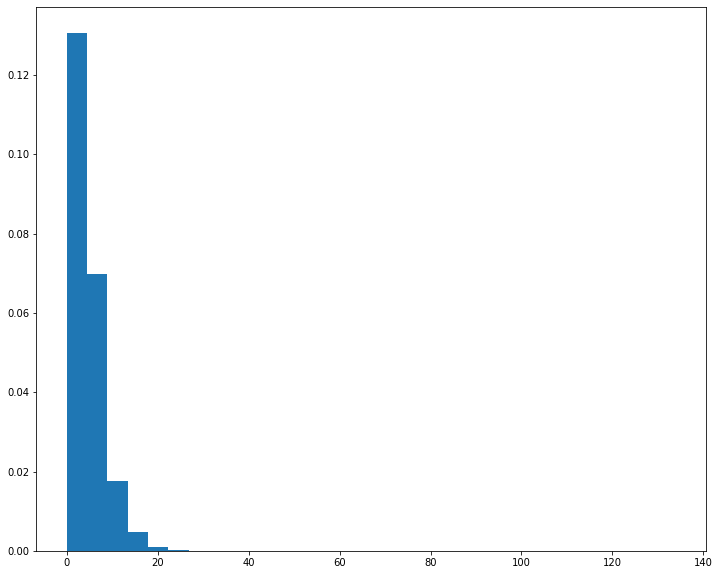

In [783]:
plt.figure(figsize=(12,10))
plt.hist(
        weather_data_vic['Evaporation'][~weather_data_vic['Evaporation'].isna()],
        density=True,
        bins=30
    )

....


Hence, we can also drop <code>Evaporation</code>

# <font color='green'>Drop the columns <code>Cloud9am, Cloud3pm, Sunshine, Evaporation</code> from weather dataset</font>

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,1/12/2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2/12/2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,3/12/2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,4/12/2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,5/12/2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217044,24/08/2022,Uluru,3.9,19.4,0.0,NaN,NaN,ESE,46.0,ESE,...,21.0,1030.9,1026.5,NaN,NaN,10.2,18.2,No,0.0,No
217045,25/08/2022,Uluru,3.6,20.0,0.0,NaN,NaN,E,44.0,E,...,17.0,1028.0,1023.6,NaN,NaN,10.4,19.8,No,0.0,No
217046,26/08/2022,Uluru,3.8,21.2,0.0,NaN,NaN,E,35.0,E,...,16.0,1024.2,1019.4,5.0,NaN,11.2,20.1,No,0.0,No
217047,27/08/2022,Uluru,3.2,24.6,0.0,NaN,NaN,ENE,28.0,ESE,...,10.0,1019.9,1014.3,NaN,NaN,12.2,23.4,No,0.0,No


# II. Preprocess the employment dataset

Similar to preprocessing the weather dataset, 

To make the preprocessing steps more compact, versatile, and reversible, 

I will create a dictionary (where its value is also a dictionary) as such: 

- <code> history_employ_preproc = { num_iteration: {'data': pd_data, 'description': what_is_done} } </code>, where: 
    - <code>num_iteration = 0,1,2,...</code> signifying how many times the dataset has been altered for preprocessing
    - <code>history_employ_preproc[num_iteration]['description']</code> is a (preferrably short) description of what has been done to the dataframe, in which the resulting dataframe will be stored in <code>history_employ_preproc[num_iteration]['data']</code>



A caveat of this is that it can be memory intensive but we'll see the consequences later

In [834]:
history_employ_preproc = {0: {'data': employment_data_raw, 'description':'raw data'} }

In [835]:
employment_data_raw.head()

,Note,"Cells containing a dash (-) indicate that data are unavailable. Estimates are unavailable either because the SA2 labour force estimate did not meet the minimum size or because there is a break in the series caused by the shift from the 2011 to the 2016 ASGS. For more information, see SALM Methodology page on the National Skills Commission (NSC) website and the 2016 ASGS changeover user guide (also available from the NSC website).",Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48
0,Data Item,Statistical Area Level 2 (SA2) (2016 ASGS),SA2 Code (2016 ASGS),Dec-10,Mar-11,Jun-11,Sep-11,Dec-11,Mar-12,Jun-12,...,Dec-19,Mar-20,Jun-20,Sep-20,Dec-20,Mar-21,Jun-21,Sep-21,Dec-21,Mar-22
1,Smoothed unemployment (persons),Braidwood,101021007,53,42,38,39,44,47,51,...,65,64,73,72,79,85,88,94,103,109
2,Smoothed unemployment (persons),Karabar,101021008,132,99,88,83,91,96,100,...,170,182,202,191,204,210,224,242,258,267
3,Smoothed unemployment (persons),Queanbeyan,101021009,209,164,139,135,143,152,159,...,179,192,223,225,248,261,274,298,314,323
4,Smoothed unemployment (persons),Queanbeyan - East,101021010,50,39,35,34,39,43,45,...,61,63,76,77,88,94,97,106,112,118


Now the first row should be the columns instead of the current one, which is not uncommon for excel files to have notes on top of the data itself

In [839]:
original_cols = list(history_employ_preproc[0]['data'].iloc[0,:])

Mapping the original columns to the desired columns

In [843]:
map_curr_col_to_original_cols = dict(zip(history_employ_preproc[0]['data'].columns, original_cols))

# <font color='blue'>Preprocessing: fix the column names </font>

In [853]:
history_employ_preproc[1] = {'data':None, 'description':None}
history_employ_preproc[1]['data'] = history_employ_preproc[0]['data'].rename(columns = map_curr_col_to_original_cols).drop(0).copy()
history_employ_preproc[1]['description'] = 'Fixing the columns'

In [854]:
history_employ_preproc[1]['data']

,Data Item,Statistical Area Level 2 (SA2) (2016 ASGS),SA2 Code (2016 ASGS),Dec-10,Mar-11,Jun-11,Sep-11,Dec-11,Mar-12,Jun-12,...,Dec-19,Mar-20,Jun-20,Sep-20,Dec-20,Mar-21,Jun-21,Sep-21,Dec-21,Mar-22
1,Smoothed unemployment (persons),Braidwood,101021007,53,42,38,39,44,47,51,...,65,64,73,72,79,85,88,94,103,109
2,Smoothed unemployment (persons),Karabar,101021008,132,99,88,83,91,96,100,...,170,182,202,191,204,210,224,242,258,267
3,Smoothed unemployment (persons),Queanbeyan,101021009,209,164,139,135,143,152,159,...,179,192,223,225,248,261,274,298,314,323
4,Smoothed unemployment (persons),Queanbeyan - East,101021010,50,39,35,34,39,43,45,...,61,63,76,77,88,94,97,106,112,118
5,Smoothed unemployment (persons),Queanbeyan Region,101021011,78,59,48,42,45,47,52,...,88,94,124,127,142,153,151,160,163,164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6518,Smoothed unemployment rate (%),Torrens,801091110,4,3.7,4.1,4.1,4.1,4.5,4,...,3.4,2.9,2.9,2.8,2.9,3.2,3.4,3.7,4.1,4
6519,Smoothed unemployment rate (%),Coombs,801101135,-,-,-,-,-,-,-,...,-,3.6,3.4,3.3,3.3,3.5,3.4,3.1,3.2,3
6520,Smoothed unemployment rate (%),Denman Prospect,801101136,-,-,-,-,-,-,-,...,-,2.8,2.6,2.4,2.4,2.8,2.9,3.3,3.7,4
6521,Smoothed unemployment rate (%),Wright,801101139,-,-,-,-,-,-,-,...,-,0.8,1.1,1.3,1.5,1.8,1.9,1.9,1.9,1.8


# Take a look at <code>Data Item</code>. It seems that it provides an indicator of what do the numbers mean.

In [855]:
history_employ_preproc[1]['data']['Data Item'].unique()

array(['Smoothed unemployment (persons)',
       'Smoothed labour force (persons)',
       'Smoothed unemployment rate (%)'], dtype=object)

# <font color='blue'> Preprocessing: we only need unemployment rate. The number of ppl itself isn't really useful </font>

In [862]:
history_employ_preproc[2] = {'data':None, 'description':None}

history_employ_preproc[2]['data'] = history_employ_preproc[1]['data'][
    history_employ_preproc[1]['data']['Data Item'] == 'Smoothed unemployment rate (%)'
].drop(columns='Data Item').copy()


#also, renaming the first 2 columns to make their names easier to read:

history_employ_preproc[2]['data'] = history_employ_preproc[2]['data'].\
    rename(columns={'Statistical Area Level 2 (SA2) (2016 ASGS)':'SA2_Name',
                    'SA2 Code (2016 ASGS)':'SA2_Code'})


history_employ_preproc[2]['description'] = 'Only obtain unemployment rates, fix first 2 column names'

In [863]:
history_employ_preproc[2]['data']

,SA2_Name,SA2_Code,Dec-10,Mar-11,Jun-11,Sep-11,Dec-11,Mar-12,Jun-12,Sep-12,...,Dec-19,Mar-20,Jun-20,Sep-20,Dec-20,Mar-21,Jun-21,Sep-21,Dec-21,Mar-22
4349,Braidwood,101021007,3,2.3,2.1,2.1,2.3,2.5,2.7,2.8,...,2.9,2.9,3.2,3.2,3.6,4,4.2,4.6,5.1,5.3
4350,Karabar,101021008,2.5,1.8,1.6,1.5,1.6,1.7,1.8,2.1,...,3.4,3.7,4,3.9,4.2,4.5,4.9,5.4,5.8,6
4351,Queanbeyan,101021009,3.3,2.5,2.1,2,2.1,2.3,2.3,2.7,...,2.6,2.7,3.2,3.2,3.6,3.9,4.2,4.7,5,5.1
4352,Queanbeyan - East,101021010,1.6,1.2,1.1,1,1.2,1.3,1.3,1.5,...,1.8,1.9,2.3,2.3,2.7,3,3.2,3.6,3.8,4
4353,Queanbeyan Region,101021011,0.9,0.7,0.5,0.5,0.5,0.5,0.6,0.6,...,0.7,0.7,1,1,1.1,1.2,1.2,1.4,1.4,1.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6518,Torrens,801091110,4,3.7,4.1,4.1,4.1,4.5,4,4.1,...,3.4,2.9,2.9,2.8,2.9,3.2,3.4,3.7,4.1,4
6519,Coombs,801101135,-,-,-,-,-,-,-,-,...,-,3.6,3.4,3.3,3.3,3.5,3.4,3.1,3.2,3
6520,Denman Prospect,801101136,-,-,-,-,-,-,-,-,...,-,2.8,2.6,2.4,2.4,2.8,2.9,3.3,3.7,4
6521,Wright,801101139,-,-,-,-,-,-,-,-,...,-,0.8,1.1,1.3,1.5,1.8,1.9,1.9,1.9,1.8


Now, pick the SA2s *only* in Victoria. 
- To do this need to look at the lookup dataset <code>sa2_and_states</code> created at the beginning of this notebook.

In [864]:
sa2_and_states.head() 

,SA2_5DIGITCODE_2016,SA2_MAINCODE_2016,SA2_NAME_2016,SA3_CODE_2016,SA3_NAME_2016,SA4_CODE_2016,SA4_NAME_2016,GCCSA_CODE_2016,GCCSA_NAME_2016,STATE_CODE_2016,STATE_NAME_2016,AREA_ALBERS_SQKM,Unnamed: 12,Unnamed: 13
0,11007,101021007,Braidwood,10102,Queanbeyan,101,Capital Region,1RNSW,Rest of NSW,1,New South Wales,3418.3525,NaN,NaN
1,11008,101021008,Karabar,10102,Queanbeyan,101,Capital Region,1RNSW,Rest of NSW,1,New South Wales,6.9825,NaN,This spreadsheet is downloaded from the ABS We...
2,11009,101021009,Queanbeyan,10102,Queanbeyan,101,Capital Region,1RNSW,Rest of NSW,1,New South Wales,4.7634,NaN,https://www.abs.gov.au/AUSSTATS/abs@.nsf/Detai...
3,11010,101021010,Queanbeyan - East,10102,Queanbeyan,101,Capital Region,1RNSW,Rest of NSW,1,New South Wales,13.0034,NaN,Its name is
4,11011,101021011,Queanbeyan Region,10102,Queanbeyan,101,Capital Region,1RNSW,Rest of NSW,1,New South Wales,3054.4099,NaN,Statistical Area Level 2 (SA2) ASGS Edition 20...


Hence, we only need <code>['SA2_MAINCODE_2016', 'SA2_NAME_2016']</code>
- and <code>'STATE_NAME_2016'</code> but just for filtering SA2s in Victoria

In [869]:
sa2s_in_vic = sa2_and_states[sa2_and_states['STATE_NAME_2016'] == 'Victoria'][['SA2_MAINCODE_2016', 'SA2_NAME_2016']]

In [870]:
sa2s_in_vic

,SA2_MAINCODE_2016,SA2_NAME_2016
578,201011001,Alfredton
579,201011002,Ballarat
580,201011003,Ballarat - North
581,201011004,Ballarat - South
582,201011005,Buninyong
...,...,...
1037,217041478,Moyne - West
1038,217041479,Warrnambool - North
1039,217041480,Warrnambool - South
1040,297979799,Migratory - Offshore - Shipping (Vic.)


Perform an inner join (inner because we don't care about the rest of SA2s outside Victoria)

In [874]:
history_employ_preproc[2]['data']

,SA2_Name,SA2_Code,Dec-10,Mar-11,Jun-11,Sep-11,Dec-11,Mar-12,Jun-12,Sep-12,...,Dec-19,Mar-20,Jun-20,Sep-20,Dec-20,Mar-21,Jun-21,Sep-21,Dec-21,Mar-22
4349,Braidwood,101021007,3,2.3,2.1,2.1,2.3,2.5,2.7,2.8,...,2.9,2.9,3.2,3.2,3.6,4,4.2,4.6,5.1,5.3
4350,Karabar,101021008,2.5,1.8,1.6,1.5,1.6,1.7,1.8,2.1,...,3.4,3.7,4,3.9,4.2,4.5,4.9,5.4,5.8,6
4351,Queanbeyan,101021009,3.3,2.5,2.1,2,2.1,2.3,2.3,2.7,...,2.6,2.7,3.2,3.2,3.6,3.9,4.2,4.7,5,5.1
4352,Queanbeyan - East,101021010,1.6,1.2,1.1,1,1.2,1.3,1.3,1.5,...,1.8,1.9,2.3,2.3,2.7,3,3.2,3.6,3.8,4
4353,Queanbeyan Region,101021011,0.9,0.7,0.5,0.5,0.5,0.5,0.6,0.6,...,0.7,0.7,1,1,1.1,1.2,1.2,1.4,1.4,1.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6518,Torrens,801091110,4,3.7,4.1,4.1,4.1,4.5,4,4.1,...,3.4,2.9,2.9,2.8,2.9,3.2,3.4,3.7,4.1,4
6519,Coombs,801101135,-,-,-,-,-,-,-,-,...,-,3.6,3.4,3.3,3.3,3.5,3.4,3.1,3.2,3
6520,Denman Prospect,801101136,-,-,-,-,-,-,-,-,...,-,2.8,2.6,2.4,2.4,2.8,2.9,3.3,3.7,4
6521,Wright,801101139,-,-,-,-,-,-,-,-,...,-,0.8,1.1,1.3,1.5,1.8,1.9,1.9,1.9,1.8


In [876]:
history_employ_preproc[2]['data'].dtypes['SA2_Code'], sa2s_in_vic.dtypes['SA2_MAINCODE_2016']

(dtype('O'), dtype('int64'))

We want to join based on the SA2 codes but the data types aren't the same.

<font color='blue'> Preprocessing: type cast the SA2 codes in the employment dataset to integers </font>

In [877]:
history_employ_preproc[2]['data']['SA2_Code'] = history_employ_preproc[2]['data']['SA2_Code'].astype('int')

In [879]:
history_employ_preproc[2]['description'] += ' and typecasted SA2_Code as integers'

# <font color='blue'>Preprocessing: for employment data, filter out SA2s that are outside Victoria </font>

Document this preprocessing step

In [885]:
#how many iterations are we in at the employment data?
history_employ_preproc.keys()

dict_keys([0, 1, 2])

In [ ]:
history_employ_preproc[3] = {'data':None, 'description':None}


In [884]:
history_employ_preproc[2]['data'].\
    merge(sa2s_in_vic, left_on='SA2_Code', right_on='SA2_MAINCODE_2016', how='inner').\
    drop(columns=['SA2_MAINCODE_2016', 'SA2_NAME_2016'])

,SA2_Name,SA2_Code,Dec-10,Mar-11,Jun-11,Sep-11,Dec-11,Mar-12,Jun-12,Sep-12,...,Dec-19,Mar-20,Jun-20,Sep-20,Dec-20,Mar-21,Jun-21,Sep-21,Dec-21,Mar-22
0,Alfredton,201011001,2.9,2.7,2.8,2.7,2.6,2.7,2.4,2.3,...,1.5,1.4,1.9,2.6,3.4,3.7,3.4,2.7,2.2,1.8
1,Ballarat,201011002,7.8,7.3,7.3,6.9,6.3,6.1,5.7,5.5,...,3.3,2.8,3.4,4.2,5.2,5.3,4.8,3.8,3.1,2.6
2,Ballarat - North,201011003,6.5,6.2,6.3,6,5.6,5.4,5.1,4.9,...,3.2,2.8,3.5,4.5,5.6,5.8,5.4,4.2,3.5,3
3,Ballarat - South,201011004,9.6,9,9,8.5,8,7.8,7.3,6.9,...,5.3,4.5,5.6,7,8.8,9.1,8.6,7,5.9,5.1
4,Buninyong,201011005,3.3,3.3,3.3,3.2,2.9,2.6,2.4,2.5,...,1.6,1.4,1.9,2.4,3.1,3.4,3.2,2.5,2,1.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,Otway,217031476,3.6,4.9,5.2,5.4,5.7,5.4,5.2,5.5,...,1.8,1.7,2.1,2.5,2.8,3.5,3.7,3.7,3.7,2.9
447,Moyne - East,217041477,2.9,3.7,3.9,3.9,3.7,3.6,3.5,3.8,...,2.2,2.4,2.6,2.8,2.7,3.1,3.2,3.3,3.5,3
448,Moyne - West,217041478,2.7,3.7,3.9,4,3.9,3.4,3.1,3.1,...,1.9,2.1,2.2,2.3,2.2,2.4,2.5,2.5,2.6,2.2
449,Warrnambool - North,217041479,4.4,5.9,6.2,6.2,6,5.5,5.1,5.4,...,3,3.2,3.2,3.3,3.1,3.5,3.7,3.8,4,3.3
